In [1]:
import os
import numpy  as np 
import warnings
warnings.filterwarnings("ignore")

import random
from random import seed
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
train_directory = '/Users/aarushimundra/Documents/GitHub/IS4242Group8/data_preprocessing_image_classification/train'
test_directory = '/Users/aarushimundra/Documents/GitHub/IS4242Group8/data_preprocessing_image_classification/test'

In [3]:
train_data_generator = ImageDataGenerator(
    #rescale=1./255,
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True
)

validation_data_generator = ImageDataGenerator(
    #rescale=1./255,
    preprocessing_function=preprocess_input,
    validation_split=0.2,
)

test_data_generator = ImageDataGenerator(
    #rescale = 1./255,
    preprocessing_function=preprocess_input
)

In [4]:
train_generator = train_data_generator.flow_from_directory(
    train_directory,
    target_size=(150,150),
    class_mode='binary',
    batch_size=128,
    shuffle = True,
    subset="training",
    seed = 43
)


Found 1752 images belonging to 4 classes.


In [5]:
validation_generator = validation_data_generator.flow_from_directory(
    train_directory,
    target_size=(150,150),
    class_mode='binary',
    batch_size=128,
    shuffle = True,
    subset="validation",
    seed = 43
)

Found 438 images belonging to 4 classes.


In [6]:
test_generator = test_data_generator.flow_from_directory(
    test_directory,
    target_size=(150,150),
    class_mode='binary',
    batch_size=128,
    shuffle = True
)

Found 66 images belonging to 4 classes.


In [7]:
core = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
core.trainable = False

# Define the sequential model
model = Sequential([
    core,
    Flatten(),
    Dense(100, activation="relu"),
    Dropout(0.2),
    Dense(50, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=["accuracy"])

# Define early stopping callback
earlystopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

# Define model checkpoint callback based on validation accuracy
checkpoint_path = "model_checkpoint.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

# Train the model
history = model.fit(train_generator, epochs=15, validation_data=validation_generator, callbacks=[earlystopping, checkpoint])

Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.2311 - loss: -142.4639 
Epoch 1: val_accuracy improved from -inf to 0.24658, saving model to model_checkpoint.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 317s 23s/step - accuracy: 0.2320 - loss: -154.4769 - val_accuracy: 0.2466 - val_loss: -1004.4247
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.2512 - loss: -1287.6699 
Epoch 2: val_accuracy did not improve from 0.24658
14/14 ━━━━━━━━━━━━━━━━━━━━ 310s 22s/step - accuracy: 0.2508 - loss: -1318.7261 - val_accuracy: 0.2466 - val_loss: -3388.6943
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.2470 - loss: -3923.9292 
Epoch 3: val_accuracy did not improve from 0.24658
14/14 ━━━━━━━━━━━━━━━━━━━━ 315s 23s/step - accuracy: 0.2470 - loss: -3988.6648 - val_accuracy: 0.2466 - val_loss: -8514.9492
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.2579 - loss: -8643.7275 
Epoch 4: val_accuracy did not improve from 0.24658
14/14 ━━━━━━━━━━━━━━━━━━━━

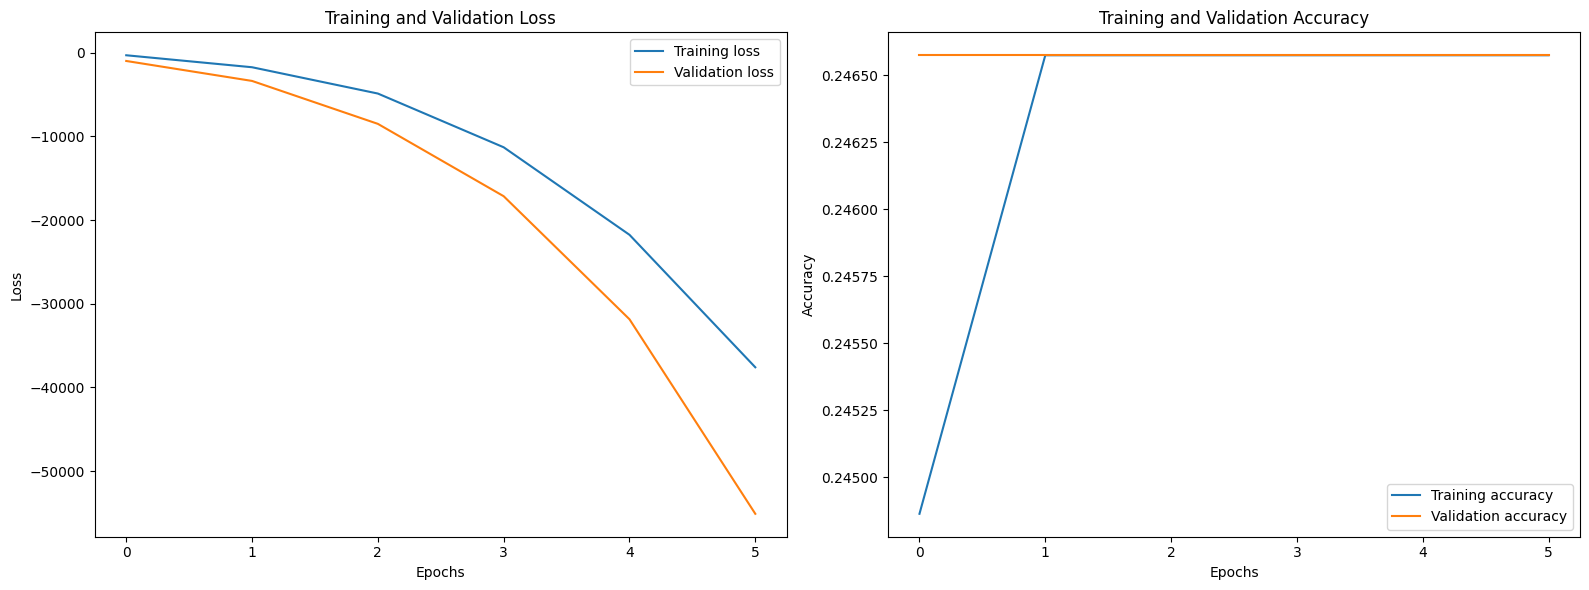

In [9]:
import matplotlib.pyplot as plt

def plot_training_history(history, metrics=['loss', 'accuracy'], figsize=(12, 5)):
    """
    Plot training and validation metrics over epochs.

    Parameters:
        history (History): History object returned by model.fit().
        metrics (list): List of metrics to plot (e.g., ['loss', 'accuracy']).
        figsize (tuple): Figure size (width, height) in inches.

    Returns:
        None
    """
    # Create subplots based on the number of metrics
    num_metrics = len(metrics)
    plt.figure(figsize=figsize)
    
    for i, metric in enumerate(metrics, 1):
        plt.subplot(1, num_metrics, i)
        plt.plot(history.epoch, history.history[metric], label='Training ' + metric)
        plt.plot(history.epoch, history.history['val_' + metric], label='Validation ' + metric)
        plt.title('Training and Validation ' + metric.capitalize())
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'history' contains the training history object
plot_training_history(history, metrics=['loss', 'accuracy'], figsize=(16, 6))